In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Insurance claims data.csv")

In [4]:
df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [6]:
df.isna().sum()

,0
policy_id,0
subscription_length,0
vehicle_age,0
customer_age,0
region_code,0
region_density,0
segment,0
model,0
fuel_type,0
max_torque,0


In [11]:
print(df['claim_status'].value_counts())

claim_status
0    54844
1     3748
Name: count, dtype: int64


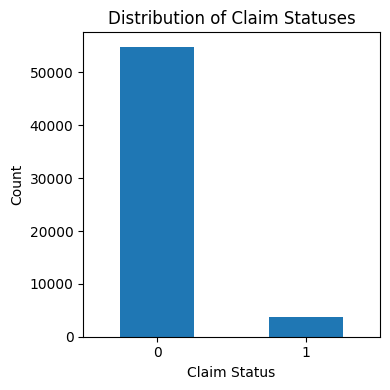

In [15]:
plt.figure(figsize=(4,4))
df['claim_status'].value_counts().plot(kind='bar')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.title('Distribution of Claim Statuses')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Relevant Columns

In [16]:
categorical_columns = df[['region_code', 'segment', 'fuel_type']]
numerical_columns = df[ ['subscription_length', 'vehicle_age', 'customer_age']]

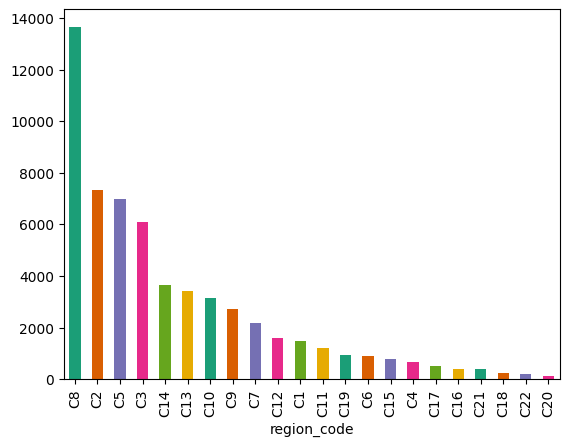

In [36]:
categorical_columns['region_code'].value_counts().plot(kind='bar' ,color=sns.palettes.mpl_palette('Dark2'))
plt.show()

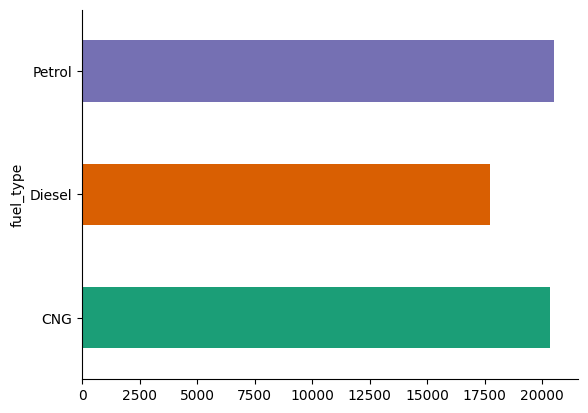

In [21]:
categorical_columns.groupby('fuel_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

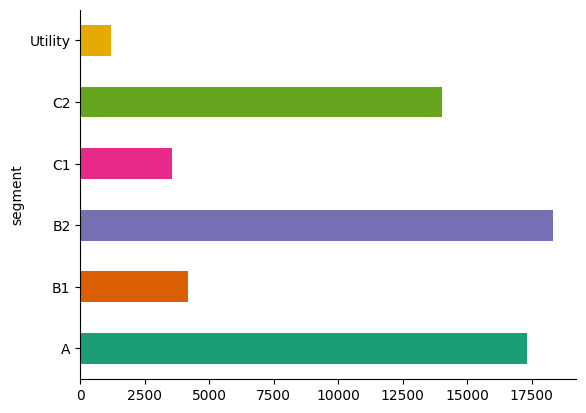

In [22]:
categorical_columns.groupby('segment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

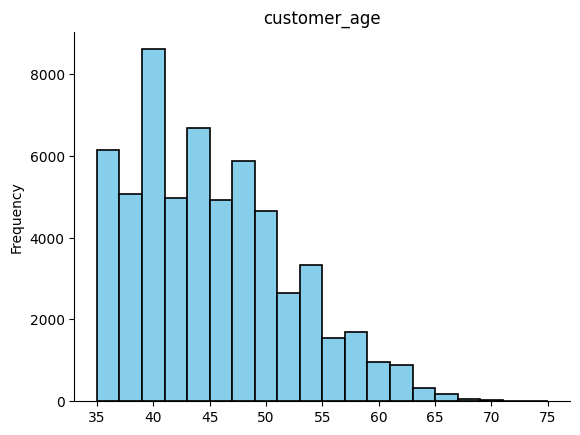

In [32]:
numerical_columns['customer_age'].plot(kind='hist', bins=20, title='customer_age',color='skyblue',edgecolor='black',linewidth=1.2)
plt.gca().spines[['top', 'right',]].set_visible(False)

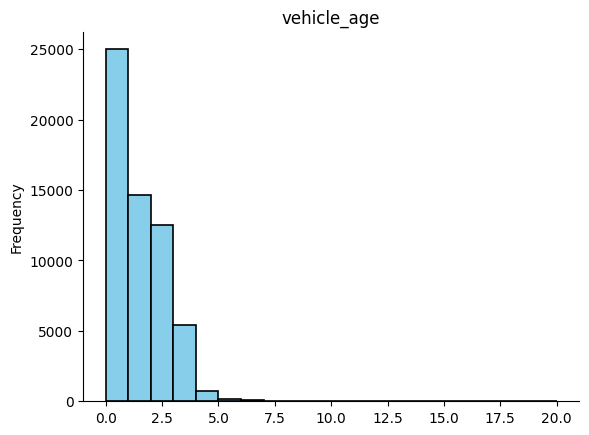

In [33]:
numerical_columns['vehicle_age'].plot(kind='hist', bins=20, title='vehicle_age',color='skyblue',edgecolor='black',linewidth=1.2)
plt.gca().spines[['top', 'right',]].set_visible(False)

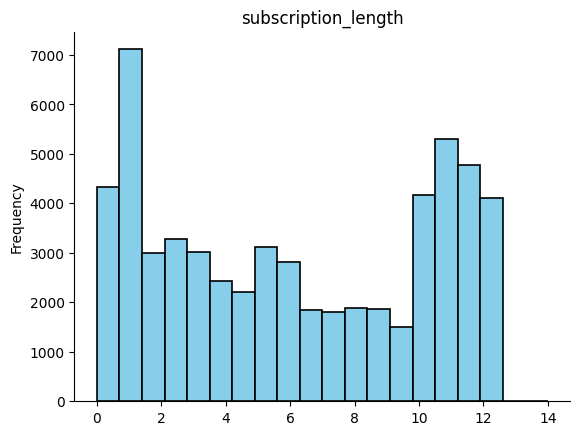

In [35]:
numerical_columns['subscription_length'].plot(kind='hist', bins=20, title='subscription_length',color='skyblue',edgecolor='black',linewidth=1.2)
plt.gca().spines[['top', 'right',]].set_visible(False)

Resampling the data

In [39]:
from sklearn.utils import resample
majority = df[df['claim_status'] == 0]
minority = df[df['claim_status'] == 1]

In [40]:
minority_oversampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
new_data= pd.concat([majority, minority_oversampled])

In [41]:
new_data['claim_status'].value_counts()

,count
claim_status,
0,54844
1,54844


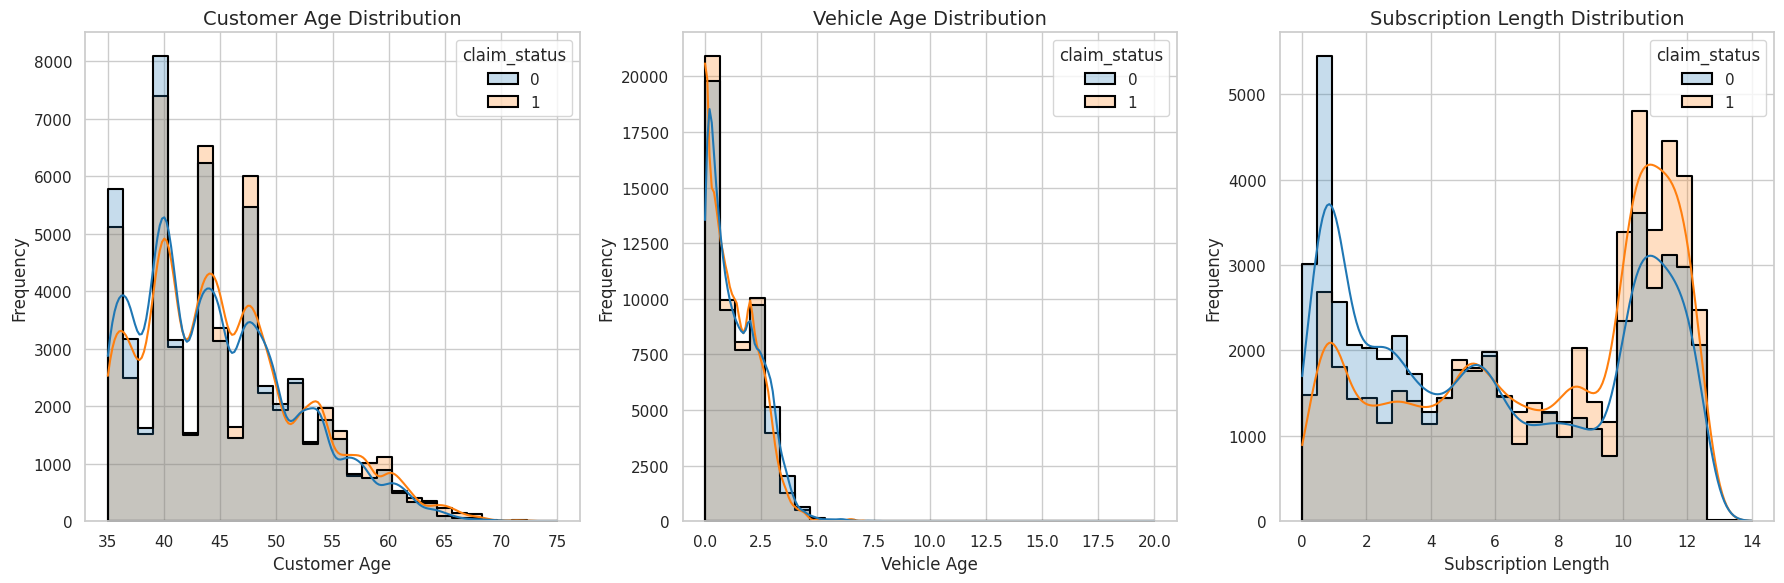

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
colors = ["#1f77b4", "#ff7f0e"]

plt.figure(figsize=(18,6))

# 'customer_age' distribution
plt.subplot(1, 3, 1)
sns.histplot(
    data=new_data,
    x='customer_age',
    hue='claim_status',
    element='step',
    bins=30,
    palette=colors,
    kde=True,
    edgecolor='black',
    linewidth=1.5
)
plt.title('Customer Age Distribution', fontsize=14)
plt.xlabel('Customer Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


# 'vehicle_age' distribution
plt.subplot(1, 3, 2)
sns.histplot(
    data=new_data,
    x='vehicle_age',
    hue='claim_status',
    element='step',
    bins=30,
    palette=colors,
    kde=True,
    edgecolor='black',
    linewidth=1.5
)
plt.title('Vehicle Age Distribution', fontsize=14)
plt.xlabel('Vehicle Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 'subscription_length' distribution
plt.subplot(1, 3, 3)
sns.histplot(
    data=new_data,
    x='subscription_length',
    hue='claim_status',
    element='step',
    bins=30,
    palette=colors,
    kde=True,
    edgecolor='black',
    linewidth=1.5
)
plt.title('Subscription Length Distribution', fontsize=14)
plt.xlabel('Subscription Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.tight_layout()
plt.show()


Modelling

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encodeddf=new_data.apply(lambda col: encoder.fit_transform(col) if col.dtype == 'object' else col)
x=encodeddf.drop('claim_status',axis=1)
y=encodeddf['claim_status']
rf=RandomForestClassifier()
rf.fit(x,y)
feature_importances=rf.feature_importances_
features_df = pd.DataFrame({
    'Feature': x.columns,       # Feature names
    'Importance': feature_importances  # Corresponding importance scores
})

features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df.head(10))

                Feature  Importance
0             policy_id    0.264872
1   subscription_length    0.256548
3          customer_age    0.166637
2           vehicle_age    0.161896
4           region_code    0.064275
5        region_density    0.063825
7                 model    0.001703
19         displacement    0.001597
24               length    0.001549
6               segment    0.001544


Training the model

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
new_data=encodeddf.drop('policy_id',axis=1)
x=new_data.drop('claim_status',axis=1)
y=new_data['claim_status']
rf=RandomForestClassifier()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9791685659586107


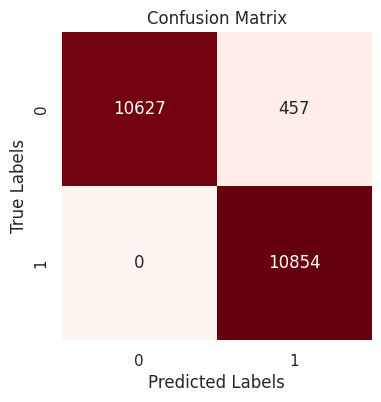

In [54]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()